In [19]:
import csv
returns = []
with open('TrainLog.monitor.csv', mode='r') as csvfile:
    next(csvfile)
    reader = csv.DictReader(csvfile)
    for row in reader:
        returns.append(float(row['r']))

print(len(returns))

11964


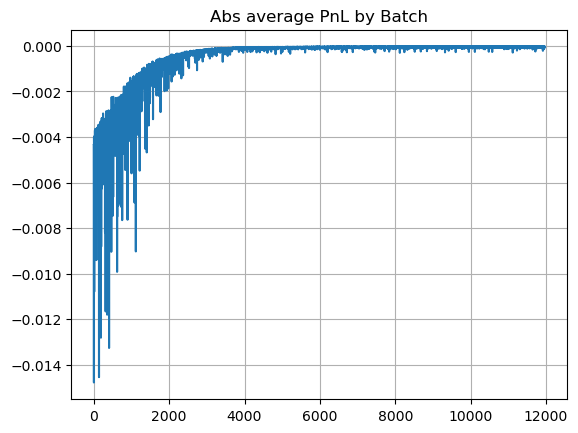

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([returnk / 251 for returnk in returns])
plt.title("Abs average PnL by Batch")
plt.grid()
plt.show()

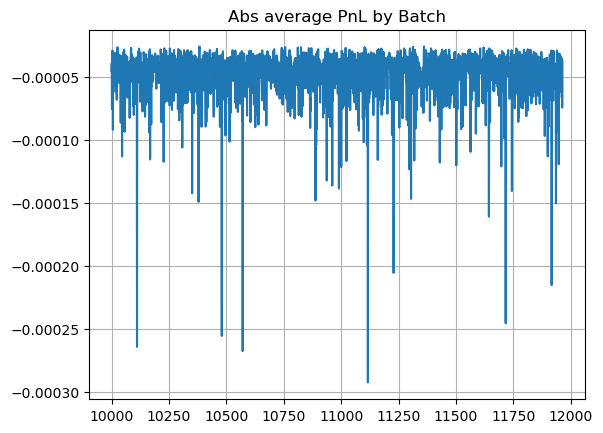

In [32]:
plt.plot(range(10000,11964),[returnk / 251 for returnk in returns[10000:]])
plt.title("Abs average PnL by Batch")
plt.grid()
plt.show()